# GenoPhenoEnvo exploration
Exploration of the KG from [*Using knowledge graphs to infer gene expression in plants*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10298150/pdf/frai-06-1201002.pdf)

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)
from collections import Counter

## Read in the data

In [3]:
edgelist = pd.read_csv('../data/genophenoenvo/merged-kg_edges.csv')
edgelist.head()

/tmp/local/34466592/ipykernel_69826/4118107600.py:1: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  edgelist = pd.read_csv('../data/genophenoenvo/merged-kg_edges.csv')


,id,subject,predicate,object,relation,provided_by,has_attribute,has_attribute_type,has_qualitative_value,has_quantitative_value,has_unit
0,urn:uuid:9bc9a223-26d3-42c2-97df-9cd73e4d3267,NCBITaxon:4577,biolink:has_phenotype,TO:0000207,RO:0002200,GR_QTL-Planteome,NaN,NaN,NaN,NaN,NaN
1,urn:uuid:a30121f9-9883-4070-b444-7a450ac8d8e1,NCBITaxon:4577,biolink:has_phenotype,TO:0000919,RO:0002200,GR_QTL-Planteome,NaN,NaN,NaN,NaN,NaN
2,urn:uuid:d6a99f29-77db-4a2c-bfe8-03d3877462e1,NCBITaxon:4577,biolink:has_phenotype,TO:0000396,RO:0002200,GR_QTL-Planteome,NaN,NaN,NaN,NaN,NaN
3,urn:uuid:9d3c1909-cf6b-42c8-ab66-ddb29c7316b6,NCBITaxon:4577,biolink:has_phenotype,TO:0000352,RO:0002200,GR_QTL-Planteome,NaN,NaN,NaN,NaN,NaN
4,urn:uuid:18286c0a-681f-44af-894a-83318cd9f4cb,NCBITaxon:4577,biolink:has_phenotype,TO:0000478,RO:0002200,GR_QTL-Planteome,NaN,NaN,NaN,NaN,NaN


In [4]:
graph = nx.from_pandas_edgelist(edgelist, source='subject', target='object', edge_attr='predicate')

In [5]:
nx.write_graphml(graph, '../data/genophenoenvo/genophenoenvo_from_edgelist.graphml')

## Characterize graph

In [5]:
print(f'There are {len(set(edgelist.predicate.values.tolist()))} unique relation types in the dataset:\n')
print(list(set(edgelist.predicate.values.tolist())))

There are 30 unique relation types in the dataset:

['biolink:interacts_with', 'biolink:has_participant', 'biolink:has_phenotype', 'biolink:develops_from', 'biolink:preceded_by', 'biolink:increases_expression_of', 'biolink:in_taxon', 'biolink:part_of', 'biolink:negatively_regulates', 'biolink:subclass_of', 'biolink:located_in', 'biolink:occurs_in', 'biolink:subPropertyOf', 'biolink:inverseOf', 'biolink:produces', 'biolink:related_to', 'biolink:has_attribute', ' Nitrate-Inducible', 'biolink:participates_in', 'biolink:active_in', 'biolink:enables', 'biolink:positively_regulates', 'biolink:coexists_with', 'biolink:has_part', 'biolink:decreases_expression_of', 'biolink:precedes', 'biolink:causes', 'biolink:expressed_in', 'biolink:orthologous_to', 'biolink:regulates']


In [7]:
print(f'There are {len(graph.nodes)} unique nodes in the dataset, and {len(graph.edges)} edges. The graph has a ratio of {len(graph.edges)/len(graph.nodes)} edges:nodes')

There are 409729 unique nodes in the dataset, and 5318857 edges. The graph has a ratio of 12.981402341547707 edges:nodes


In [12]:
degs = [deg[1] for deg in list(graph.degree)]

Text(0.5, 0.98, 'Distribution of degree')

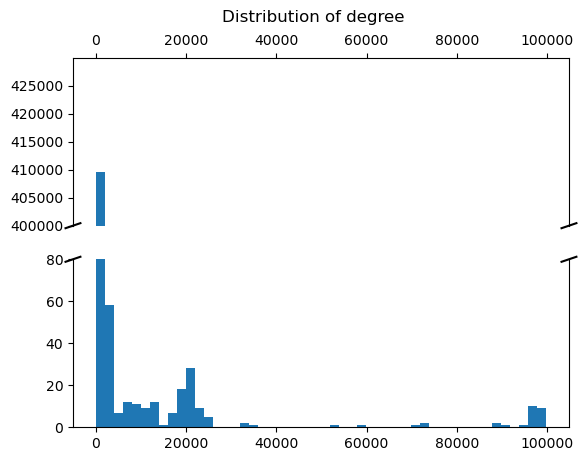

In [20]:
# Code from https://matplotlib.org/2.0.2/examples/pylab_examples/broken_axis.html
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

_ = ax1.hist(degs, bins=50)
_ = ax2.hist(degs, bins=50)

# Get max y-value
maxy = ax1.get_ylim()[1]
basemax = plt.yticks()[0][-2]

# Set the y limits
ax1.set_ylim(basemax, maxy)
ax2.set_ylim(0, 80) # Got by trial end error

# Finish formatting
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Add the cut diagonals
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

fig.suptitle('Distribution of degree')

Degree is still extremely skewed, even with many more edges; this lends creedence to the belief that this is simply what biological data would look like even with perfect extraction from natural language text.

In [21]:
print('Most highly connected entities:')
print([deg[0] for deg in list(graph.degree) if deg[1] >= 80000])

Most highly connected entities:
['TO:0000249', 'TO:0000087', 'TO:0000576', 'TO:0000051', 'TO:0000180', 'TO:0000264', 'TO:0000299', 'TO:0000140', 'TO:0000427', 'TO:0000240', 'TO:0000197', 'TO:0000294', 'TO:0000364', 'TO:0000367', 'TO:0000185', 'TO:0000055', 'TO:0000141', 'TO:0000400', 'TO:0000019', 'TO:0000027', 'TO:0000124', 'TO:0001035', 'NCBITaxon:39946']


`TO:0000249` is "leaf senescence trait", `TO:0000087`, and is "grain aroma trait", `TO:0000576` is "stem length", while `NCBITaxon:39946` is "Oryza sativa Indica group".

In [31]:
edge_counts = Counter([attr['predicate'] for e1, e2, attr in graph.edges(data=True)])

Text(0.5, 0.98, 'Edge type counts')

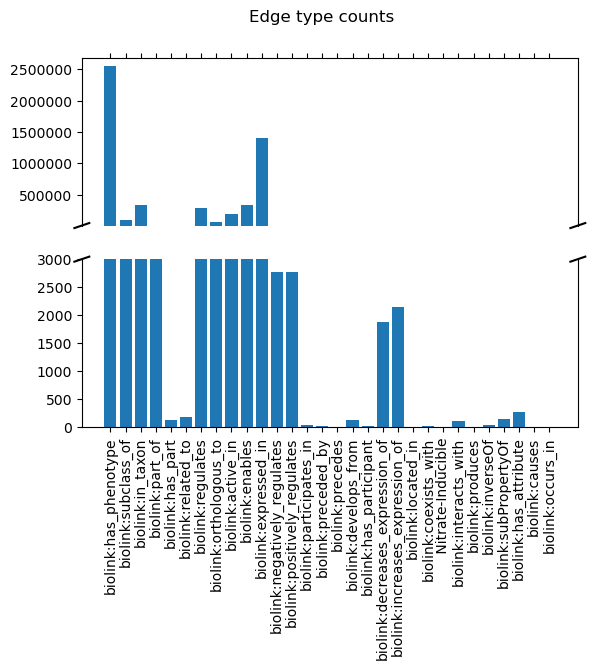

In [67]:
# Code from https://matplotlib.org/2.0.2/examples/pylab_examples/broken_axis.html
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

_ = ax1.bar(edge_counts.keys(), edge_counts.values())
_ = ax2.bar(edge_counts.keys(), edge_counts.values())

# Get max y-value
maxy = ax1.get_ylim()[1]
# basemax = plt.yticks()[0][-7]
basemax = 10000

# Set the y limits
ax1.set_ylim(basemax, maxy)
ax2.set_ylim(0, 3000) # Got by trial end error

# Finish formatting
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax2.tick_params(axis='x', labelrotation=90)
ax2.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Add the cut diagonals
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

fig.suptitle('Edge type counts')